# Open the graphs

In [63]:
G = nx.read_edgelist('../data/lesmis.txt', nodetype = int, data = (('weight', float),))
power_grid = nx.read_edgelist('../data/powergrid.txt', nodetype = int)
us_air = nx.read_edgelist('../data/usairport.txt', nodetype = int, data = (('weight', float),))
euro_road = nx.read_edgelist('../data/euroroad.txt', nodetype = int)

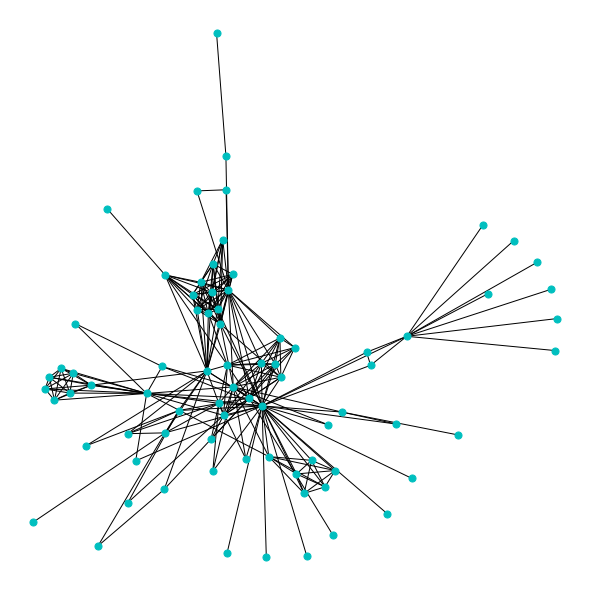

In [11]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = 'c', node_size = 50, with_labels = False)

In [12]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [13]:
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) # Getting and sorting the componnets by length
G =  G.subgraph(Gcc[0]) # Exchange the graph by the sub graph of the largest component 

In [14]:
N = len(G)
M = G.number_of_edges()

print('Number of nodes: ', N)
print('Number of edges: ', M)

Number of nodes:  77
Number of edges:  254


# Degree related measures

In [15]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)

print('Degree: ', vk)

Degree:  [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


In [16]:
mean = vk.mean()

print('Mean degree: ', mean)

Mean degree:  6.597402597402597


In [17]:
def degree_distribution(G):
    
    vk = np.array(list(dict(G.degree()).values()))
    
    maxk = vk.max()
    mink = vk.min()
    
    kvalues = np.arange(maxk + 1)
    
    Pk = np.zeros(maxk + 1)
    
    for k in vk:
        
        Pk[k] += 1
        
    Pk = Pk/Pk.sum()
    
    return kvalues, Pk

In [18]:
ks, Pk = degree_distribution(G)

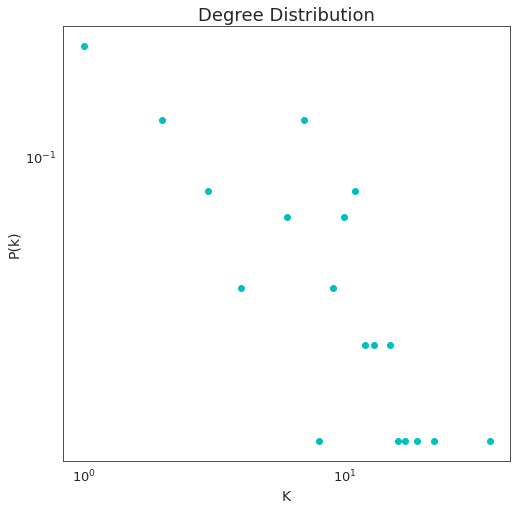

In [19]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(ks, Pk, 'oc')

ax.set_xlabel('K')
ax.set_ylabel('P(k)')

ax.set_title('Degree Distribution')

plt.show(True)

In [20]:
def momment_of_degree_distribution(G, m):
    
    K, Pk = degree_distribution(G)
    
    M = np.sum((K**m)*Pk)
    
    return M

In [21]:
def momment_of_degree_distribution2(G, m):
    
    M, N = 0, len(G)
    
    for i in G.nodes:
        
        M += G.degree(i)**m
    
    M /= N
    
    return M

In [22]:
k1 = momment_of_degree_distribution(G, 1)

print(f'Mean degree = {vk.mean():.2f}')
print(f'First momment of the degree distribution = {k1:.2f}')

Mean degree = 6.60
First momment of the degree distribution = 6.60


In [23]:
k2 = momment_of_degree_distribution2(G, 2)

print(f'Second momment of the degree distribution = {k2:.2f}')

Second momment of the degree distribution = 79.53


In [24]:
variance = momment_of_degree_distribution(G, 2) - momment_of_degree_distribution(G, 1)**2

print(f'Variance of the degree = {variance:.2f}')

Variance of the degree = 36.01


# Shannon Entropy

In [25]:
def shannon_entropy(G):
    
    k, Pk = degree_distribution(G)
    
    H = 0 
    
    for p in Pk:
        
        if p > 0 :
            H -= p*np.log2(p)
    
    return H

In [26]:
H = shannon_entropy(G)

print(f'Shannon Entropy: {H:.2f}')

Shannon Entropy: 3.60


In [27]:
def normalized_shannon_entropy(G):
    
    k, Pk = degree_distribution(G)
    
    H = 0 
    
    for p in Pk:
        
        if p > 0 :
            H -= p*np.log2(p)
    
    return H/np.log2(len(G))

In [28]:
Hn = normalized_shannon_entropy(G)

print(f'Normalized Shannon Entropy: {Hn:.2f}')

Normalized Shannon Entropy: 0.57


# Transitiviy and clustering

In [29]:
CC = nx.transitivity(G) # Calculated by the global triangles 

print(f'Transitivity = {CC:.2f}')

Transitivity = 0.50


In [30]:
avc = nx.average_clustering(G) # Calculated by the local number of triangles

print(f'Avarage clustering: {avc:.2f}')

Avarage clustering: 0.57


In [31]:
vcc = []

for node in G.nodes:
    
    vcc.append(nx.clustering(G, node))
    
vcc = np.array(vcc)

print('Clustering of all nodes:', vcc)

Clustering of all nodes: [0.         0.06666667 1.         1.         0.         0.
 0.         0.         0.         0.         0.12063492 0.
 1.         0.         0.         0.         0.31428571 0.49090909
 0.40833333 0.38181818 0.32352941 0.33333333 0.64285714 0.66666667
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         0.35497835 0.47619048 0.42857143
 0.33333333 0.60952381 0.76923077 0.8        0.8        0.71111111
 0.83333333 1.         1.         0.61111111 1.         1.
 1.         1.         1.         1.         0.45454545 1.
 0.         0.33333333 0.         0.9047619  1.         0.
 0.         0.69090909 0.75641026 0.         0.         0.92727273
 1.         0.92727273 0.86363636 0.86363636 0.93333333 1.
 1.         1.         1.         0.         0.        ]


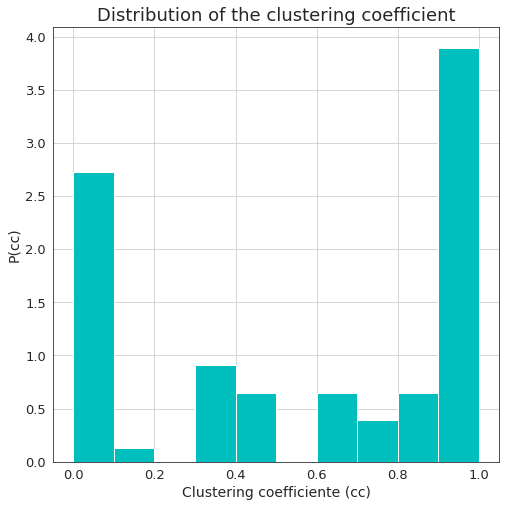

In [32]:
plt.hist(vcc, bins = 10, density = True, color = 'c')

plt.title("Distribution of the clustering coefficient")

plt.ylabel("P(cc)")
plt.xlabel("Clustering coefficiente (cc)")

plt.grid(True)

plt.show(True)

In [33]:
def average_clustering_for_k(G):
    
    ck, ks = [], []
    
    vk = np.array(list(dict(G.degree()).values()))

    for k in np.arange(vk.min(), vk.max()):
    
        aux = (vk == k)
    
        if len(vcc[aux]) > 0 :
        
            cm = vcc[aux].mean()
            ck.append(cm)
            ks.append(k)
    
    return ck, ks

In [34]:
ck, ks = average_clustering_for_k(G)

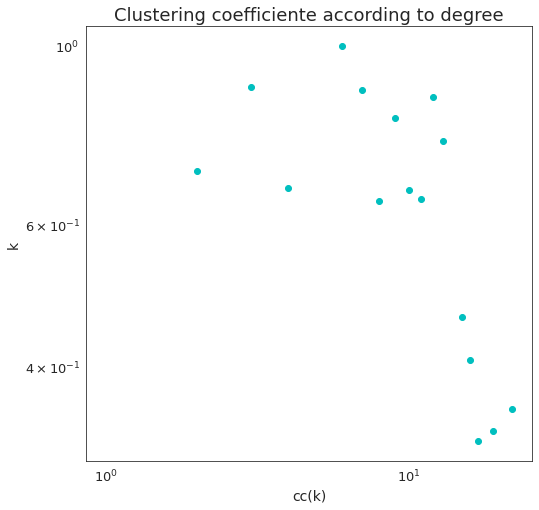

In [35]:
plt.loglog(ks, ck, 'oc')

plt.title("Clustering coefficiente according to degree")

plt.xlabel("cc(k)")
plt.ylabel("k")

plt.show(True)

# Exercises 

## 1 - For the lesmis dataset, calculate the third and fourth statistical moments.

In [36]:
m3 = momment_of_degree_distribution(G, 3)
m4 = momment_of_degree_distribution(G, 4)

print(f'Third momment of the degree distribution: {m3:.2f}')
print(f'Fourth momment of the degree distribution: {m4:.2f}')

Third momment of the degree distribution: 1408.03
Fourth momment of the degree distribution: 33592.73


## 2 - Define a function to create the complexity measure and calculate for several networks in the data set. This coefficient is defined as: C_x = E[K^2]\E[K]

In [37]:
def complexity(G):
    
    m1 = momment_of_degree_distribution(G, 1)
    m2 = momment_of_degree_distribution(G, 2)
    
    c = m2/m1
    
    return c

In [38]:
cg = complexity(G)

print(f'Complexity: {cg:.2f}')

Complexity: 12.06


## 3 - Calculate the degree distribution of the power-grid network. Also, obtain the complexity index.

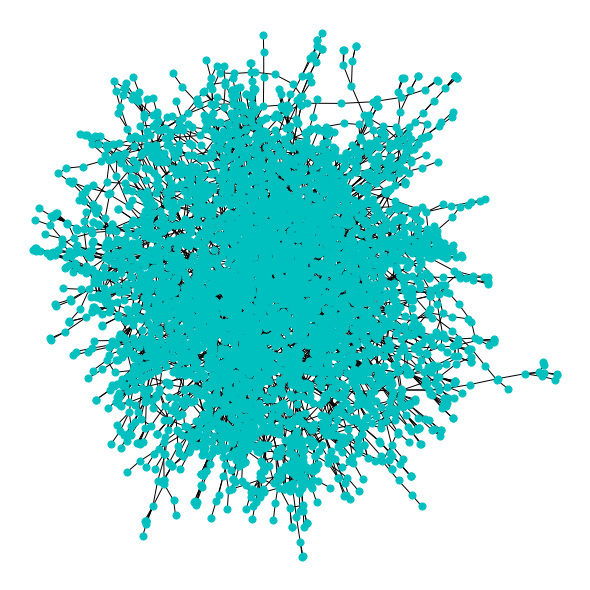

In [46]:
# node_position = nx.spring_layout(power_grid)
# nx.draw(power_grid, node_position, node_color = 'c', node_size = 50, with_labels = False)

In [47]:
ks, Pk = degree_distribution(power_grid)

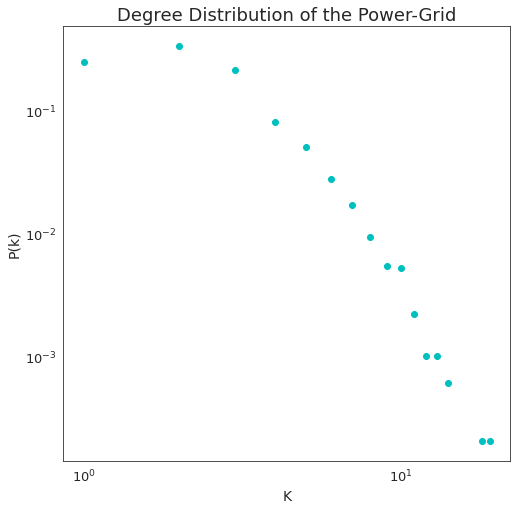

In [48]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(ks, Pk, 'oc')

ax.set_xlabel('K')
ax.set_ylabel('P(k)')

ax.set_title('Degree Distribution of the Power-Grid')

plt.show(True)

In [49]:
cpg = complexity(power_grid)

print(f'Complexity of the Power-Grid netwoerk: {cpg:.2f}')

Complexity of the Power-Grid netwoerk: 3.87


## 4 - Construct a function that returns the following networks properties:

* Number of nodes
* Number of connections
* Averge degree
* Second moment of degree distribution
* Average clustering coefficient
* Transitivity
* Shanon entropy of the degree distribution
<br></br>
* Consider the following networks:
* Power grid
* US airport
* Euro road
* Protein interactions (ppi.maayan-vidal.txt)

In [59]:
def info(G):
    
    N = len(G.nodes)
    M = len(G.edges)
    
    vk = np.array(list(dict(G.degree).values()))
    avgd = vk.mean()
    
    m2 = momment_of_degree_distribution(G, 2)
    
    avgc = nx.average_clustering(G)
    
    transi = nx.transitivity(G)
    
    sed = shannon_entropy(G)
    
    return {'N': N, 'M': M, 'avgd': avgd, 'm2':m2, 'avgc': avgc, 'transi':transi, 'sed':sed}

In [91]:
print(f'Power Grid information:\n {info(power_grid)} \n')
print(f'US Air information:\n {info(us_air)} \n')
print(f'Euro Road information:\n {info(euro_road)} \n')

Power Grid information:
 {'N': 4941, 'M': 6594, 'avgd': 2.66909532483303, 'm2': 10.33272616879174, 'avgc': 0.08010361108159712, 'transi': 0.10315322452860086, 'sed': 2.45522715113451} 

US Air information:
 {'N': 1574, 'M': 17215, 'avgd': 21.874205844980942, 'm2': 2454.7725540025413, 'avgc': 0.5041525392095769, 'transi': 0.38414344664491556, 'sed': 4.985977646539227} 

Euro Road information:
 {'N': 1174, 'M': 1417, 'avgd': 2.41396933560477, 'm2': 7.240204429301533, 'avgc': 0.016731564857629593, 'transi': 0.0338863395693611, 'sed': 2.0033103874527756} 



## 5 - Construct a function that returns the degree distribution in log or linear scale. The function can construct scatterplot or a bar plot according to its parameters.

In [90]:
def degree_distribution2(G, log = True, show = False, tp = 'scatter', title = 'Degree Distribution of G'):
    
    ks, Pk = degree_distribution(G)
    ksl, Pkl = [], []
    
    if log:
        
        ksl, Pkl = np.log(ks), np.log(Pk)
    
    if show:
        
        fig, ax = plt.subplots()

        ax.set_xlabel('K')
        ax.set_ylabel('P(k)')
    
        ax.set_title(title)
        
        if tp == 'scatter':
            if log:
                
                ax.set_xscale('log')
                ax.set_yscale('log')

                ax.plot(ks, Pk, 'oc')
            
            else:
                
                ax.plot(ks, Pk, 'oc')
                
        elif tp == 'bar':
            if log:
            
                ax.bar(ksl, Pkl)
            
            else:
                
                ax.bar(ks, Pk)
            
        else:
            raise Exception(f'The function just support "scatter" and "bar" plots as parameter for "tp". You enter: {tp}.')
        
        plt.show()
    
    if log:
        
        return ksl, Pkl
    
    return ks, Pk

<ipython-input-85-748d7438b2c0>:7: RuntimeWarning: divide by zero encountered in log
  ksl, Pkl = np.log(ks), np.log(Pk)


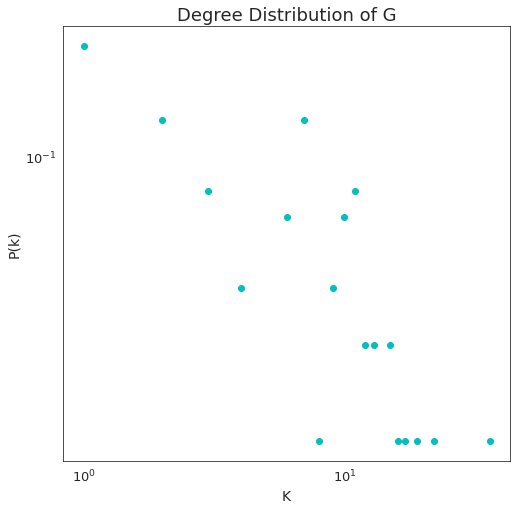

(array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
        1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
        2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
        2.7080502 , 2.77258872, 2.83321334, 2.89037176, 2.94443898,
        2.99573227, 3.04452244, 3.09104245, 3.13549422, 3.17805383,
        3.21887582, 3.25809654, 3.29583687, 3.33220451, 3.36729583,
        3.40119738, 3.4339872 , 3.4657359 , 3.49650756, 3.52636052,
        3.55534806, 3.58351894]),
 array([       -inf, -1.51059208, -2.04122033, -2.55204595, -3.24519313,
               -inf, -2.73436751, -2.04122033, -4.34380542, -3.24519313,
        -2.73436751, -2.55204595, -3.65065824, -3.65065824,        -inf,
        -3.65065824, -4.34380542, -4.34380542,        -inf, -4.34380542,
               -inf,        -inf, -4.34380542,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,      

In [89]:
degree_distribution2(G, show = True)

# Imports

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import networkx as nx

### **6. Globally Setting**

<hr></hr>

In [4]:
%matplotlib inline

In [5]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [6]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

In [7]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]